In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Loading the dataset
df = pd.read_csv('Launch SFR.csv')
df.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type,Country,HQ Location,Description
0,Arianespace/Avio,9,"20,000",170.00,"8,500",Public,"Medium, Heavy",LEO,Rocket,Italy,Colleferro,Developing the Vega & Ariane launch vehicles
1,Astra Space,9,300,3.95,"13,167",Public,Small,LEO,Rocket,United States,"Alameda, CA",Providing routine launch access to Earth orbit...
2,Black Sky Aerospace,9,350,0.60,"1,714",-,Small,Suborbital,Rocket,Australia,"Browns Plains, Queensland","Offers a range of sounding rockets, capable of..."
3,Blue Origin,9,0,0.00,0,-,"Tourism, Small, Heavy",Suborbital,Rocket,United States,"Kent, WA",Lowering the cost of access to space with reus...
4,CNIM Air Space,9,"2,700",0.00,0,Public,"Small, Medium",Suborbital,Balloon,France,Ayguesvives,Balloons that lift anything from a few kilogra...


In [ ]:
#Checking the shape of the dataset
df.shape

(183, 12)

In [ ]:
#Checking the datatypes of the columns
df.dtypes

Company              object
SFR                   int64
Payload (kg)         object
Launch Cost ($M)    float64
Price ($/kg)         object
Funding ($M)         object
Launch Class         object
Orbit Altitude       object
Tech Type            object
Country              object
HQ Location          object
Description          object
dtype: object

In [ ]:
#type casting
df['Payload (kg)'] = df['Payload (kg)'].astype(str).str.replace(',', '').astype(float)
df['Launch Cost ($M)'] = df['Launch Cost ($M)'].astype(str).str.replace(',', '').astype(float)
df['Price ($/kg)'] = df['Price ($/kg)'].astype(str).str.replace(',', '').astype(float)

In [ ]:
#Checking '-' (null values) values in the dataset
df.isin(['-']).sum()

Company               0
SFR                   0
Payload (kg)          0
Launch Cost ($M)      0
Price ($/kg)          0
Funding ($M)        110
Launch Class         16
Orbit Altitude        3
Tech Type             0
Country               0
HQ Location           8
Description           0
dtype: int64

In [ ]:
#droping the column
df.drop(['Funding ($M)'], axis=1, inplace=True)

#replacing the '-' values with mode
df['Launch Class'].replace('-', df['Launch Class'].mode()[0], inplace=True)
df['Orbit Altitude'].replace('-', df['Orbit Altitude'].mode()[0], inplace=True)

In [ ]:
df.drop(['HQ Location'], axis=1, inplace=True)

In [ ]:
#Checking for unique values in the dataset
df.nunique()

Company             183
SFR                  10
Payload (kg)         65
Launch Cost ($M)     46
Price ($/kg)         53
Launch Class         10
Orbit Altitude        4
Tech Type             8
Country              31
Description         183
dtype: int64

In [ ]:
cols = ['Launch Class', 'Orbit Altitude', 'Tech Type']
for i in cols:
    print(i, df[i].unique(), '\n')

Launch Class ['Medium, Heavy' 'Small' 'Tourism, Small, Heavy' 'Small, Medium'
 'Heavy, Super Heavy' 'Tourism' 'Medium' 'Small, Heavy' 'Tourism, Medium'
 'Heavy'] 

Orbit Altitude ['LEO' 'Suborbital' 'GTO' 'Lunar'] 

Tech Type ['Rocket' 'Balloon' 'Balloon, Rocket' 'Spaceplane' 'Plane, Rocket' 'Other'
 'Rocket, Other' 'Rocket, Spaceplane'] 



In [ ]:
def l_class(launch):
    if launch in ['Medium, Heavy','Medium']:
        return 'Medium'
    elif launch in ['Small', 'Small, Medium', 'Small, Heavy']:
        return 'Small'
    elif launch in ['Heavy', 'Heavy, Super Heavy']:
        return 'Heavy'
    elif launch in ['Tourism', 'Tourism, Small, Heavy','Tourism, Medium']:
        return 'Tourism'
df['Launch Class'] = df['Launch Class'].apply(l_class)

In [ ]:
df['Launch Class'].value_counts()

Launch Class
Small      152
Medium      15
Tourism     10
Heavy        6
Name: count, dtype: int64

In [ ]:
def tech_type(tech):
    if tech in ['Rocket', 'Plane, Rocket', 'Rocket, Other', 'Rocket, Spaceplane']:
        return 'Rocket'
    elif tech in ['Ballon', 'Balloon, Rocket']:
        return 'Balloon'
    elif tech in ['Spaceplane']:
        return 'Spaceplane'
    else:
        return 'Other'
df['Tech Type'] = df['Tech Type'].apply(tech_type)

In [ ]:
df['Tech Type'].value_counts()

Tech Type
Rocket        133
Other          23
Spaceplane     20
Balloon         7
Name: count, dtype: int64

In [ ]:
def description(description):
    if description in [
    'Developing the Vega & Ariane launch vehicles',
    'Developing the Ceres-1 and Pallas-1 launch vehicles',
    'Developing the Firefly Alpha launch vehicle; highest payload performance with the lowest cost per kg to orbit in its vehicle class',
    'Developing suborbital rockets to provide access and research for traditional and ‘New-Space’ markets',
    'The first rocket company and launch site for cubesat payloads in New Zealand',
    'Developing the ERIS launch vehicles to provide reliable and cost-effective access to space',
    'Buildig the Xogdor rocket to test payloads at supersonic speeds and at the edge of space',
    'Building a private 3-stage nanosatellite launch vehicle in China',
    'Developing the LAROS-RC2 orbital carrier and accompanying mobile launch infrastructure',
    'Developing the Trans-Atmospheric Flight Vehicle (TAV 1)',
    'Developing suborbital and orbital launch vehicles',
    'Developing a series of Launch Vehicles based on high-altitude air launch',
    'Building a hypersonic space plane that can takeoff from anywhere in any weather',
    'Developing a unique launch vehicle and propulsion system',
    'Building a space launch system for sending hardened satellites and bulk cargo into space',
    'Developing a reactive, reliable and cost-efficient nano-launcher',
    'Developing a next generation of reusable launch vehicles for microgravity research',
    'Building a reusable three-person rocket ship for space tourism',
    'Developing Infinity, a small reusable rocket',
    'Developing high-performance, low carbon micro launch vehicles']:
        return 'Launch Vehicle Development'
    elif description in [
    'Providing routine launch access to Earth orbit for entrepreneurs and enterprises',
    'Launch vehicle manufacturer and launch services provider',
    'Commercial launch vehicle manufacturer and space launch provider in China',
    'Launch services for small, micro and nano satellites',
    'Providing launch services to LEO at an affordable cost',
    'Enabling Low cost access to space with the Aerospike engined reusable Small satellite launch vehicle "MESO"',
    'Providing passengers with a trip into the stratosphere',
    'Provides earth-to-space space delivery services for small payloads',
    'Dedicated nanosatellite launch provider',
    'Rapid response small satellite launch vehicles for government and commercial customers',
    'Provding dedicated launch services for cube and nanosatellites',
    'Integrated launch services for the Zenit Launch Vehicle via a mobile sea platform',
    'Cost-effective small satellite launch services from the United Kingdom',
    'SpaceRyde offers affordable, on-schedule, dedicated launch for small sats',
    'Enabling transportation to LEO',
    'Reusable hybrid rocketry',
    'Developing a reliable tow-glider launch system',
    'Affordable and reliable small satellite launch system for LEO, SSO, and GEO missions',
    'Customized launch services for sub-orbital and orbital payloads',
    'SpaceBox is a suborbital launch and recovery platform designed to enable affordable access to space for educational, professional, consumer and hobbyist payloads']:
        return 'Launch Services'
    elif description in [
    'Offers a range of sounding rockets, capable of flights up to 300km in multistage configurations',
    'Balloons that lift anything from a few kilograms to several tons and are able to operate at an altitude as low as a few hundred meters or as high as 40 km',
    'Launching stratospheric balloons for research and promotional purposes',
    'Balloon-based small satellite launcher',
    'Building a ballooning platform to offer novel access to the mesosphere']:
        return 'Balloon-Based Technologies'
    elif description in [
    'Building rockets to launch small satellites',
    'Developing a zero-emission space tourism platform',
    'Personalized engineering support and dedicated airborne orbital launch platform',
    'Revolutionizing near space tourism and opening it to a greater audience']:
        return 'Space Tourism Suborbital'
    elif description in [
    'Designs, manufactures, and operates launch vehicles, propulsion systems, and satellites and related components',
    'Developing Dream Chaser, a multi-mission space utility vehicle designed to transport crew and cargo to low-Earth orbit',
    'A rocket, satellite, and spacecraft manufacturing company.',
    'Mass production of on-demand launchers for small sats',
    'Designing a single stage to orbit hypersonic vehicle of revolutionary design and propulsion capability',
    'Building a single-stage to orbit launch system dedicated to small payloads']:
        return 'Satellite Technology and Services'
    elif description in  [
    'Developing a unique line of rockets powered by bio-derived fuels to launch tiny satellites into space',
    'Using clean tech to develop a sustainable and cheap rocket called Haribon SLS',
    'Developing hybrid small satellite launch vehicles',
    'Privately developing rocket engines and suborbital launch vehicles in Japan',
    'Creating a reusable suborbital space complex for tourist flights into space',
    'Using RAM-accelerators to change the economics of space launch',
    'Developing a range of sustainable, reusable launchers dedicated to the launch of small satellites',
    'Developing electromagnetic launch systems to change how we launch payloads into space',
    'Redesigning launch from the ground up',
    'Developing SOL ASPIRET, a suborbital spaceplane',
    'Developing PROTEUS, an innovative hybrid and autonomous launcher for small sats']:
        return 'Innovative Propulsion Technologies'
    else:
        return 'Space Access and Technology Innovation'
df['Description'] = df['Description'].apply(description)

In [ ]:
df['Description'].value_counts()

Description
Space Access and Technology Innovation    123
Launch Vehicle Development                 19
Launch Services                            18
Innovative Propulsion Technologies         10
Satellite Technology and Services           6
Space Tourism Suborbital                    4
Balloon-Based Technologies                  3
Name: count, dtype: int64

In [ ]:
df.describe()

,SFR,Payload (kg),Launch Cost ($M),Price ($/kg)
count,183.000000,183.000000,183.000000,183.000000
mean,3.726776,2579.677596,4.840956,6587.256831
std,2.527148,8834.385310,19.132872,12755.241486
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,16.000000,0.000000,0.000000
50%,3.000000,186.000000,0.000000,0.000000
75%,5.000000,746.500000,1.500000,9250.000000
max,9.000000,63800.000000,170.000000,100000.000000


In [ ]:
df['Payload (kg)'] = df['Payload (kg)'].replace(0, df['Payload (kg)'].mean())
df['Launch Cost ($M)'] = df['Launch Cost ($M)'].replace(0, df['Launch Cost ($M)'].mean())
df['SFR'] = df['SFR'].replace(0, df['SFR'].median())

In [ ]:

price_payload_product = np.multiply(df['Price ($/kg)'], df['Payload (kg)'])

# Compute correlation between Price*Payload and Launch Cost
np.corrcoef(price_payload_product, df['Launch Cost ($M)'])[0, 1]




0.9228942584203464

In [ ]:
df.drop(columns = 'Price ($/kg)', axis=1, inplace=True)

In [ ]:
df.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Launch Class,Orbit Altitude,Tech Type,Country,Description
0,Arianespace/Avio,9,20000.000000,170.000000,Medium,LEO,Rocket,Italy,Launch Vehicle Development
1,Astra Space,9,300.000000,3.950000,Small,LEO,Rocket,United States,Launch Services
2,Black Sky Aerospace,9,350.000000,0.600000,Small,Suborbital,Rocket,Australia,Balloon-Based Technologies
3,Blue Origin,9,2579.677596,4.840956,Tourism,Suborbital,Rocket,United States,Space Access and Technology Innovation
4,CNIM Air Space,9,2700.000000,4.840956,Small,Suborbital,Other,France,Space Access and Technology Innovation


# **Exploratory Data Analysis**

**Country Of Origin**

<ipython-input-25-f39c5c12dff5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, palette='Set2')


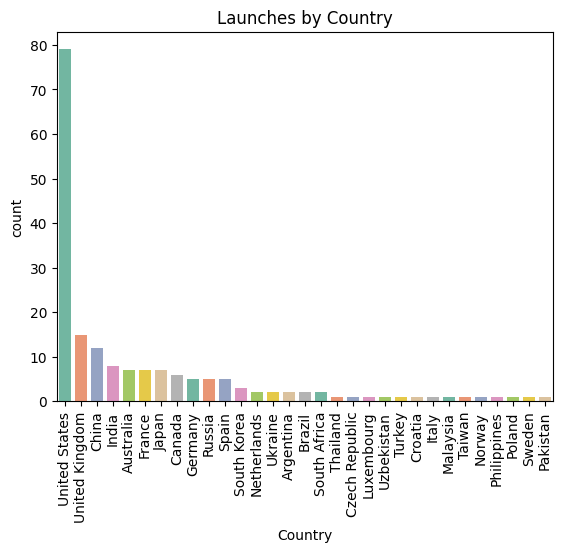

In [ ]:
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, palette='Set2')
plt.title('Launches by Country')
plt.xticks(rotation=90)  # Changed rotation angle
plt.show()

**Tech Type**

<ipython-input-26-39dc9cf25eee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tech Type', data=df, order=df['Tech Type'].value_counts().index, palette='Set3')


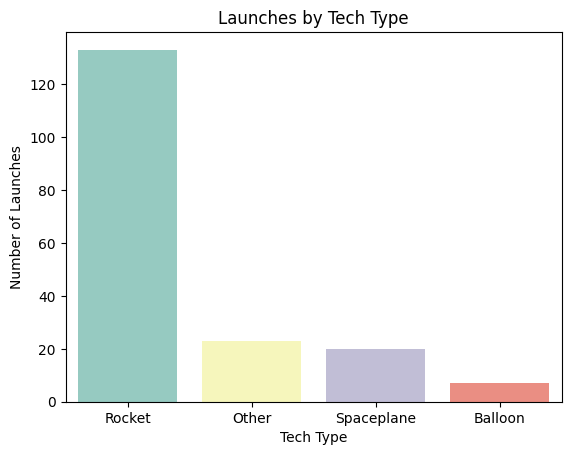

In [ ]:
sns.countplot(x='Tech Type', data=df, order=df['Tech Type'].value_counts().index, palette='Set3')
plt.title('Launches by Tech Type')
plt.xlabel('Tech Type')  # Label for x-axis
plt.ylabel('Number of Launches')  # Label for y-axis
plt.show()

**Lauch Type**

<ipython-input-27-82d79978d034>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Launch Class', data=df, order=df['Launch Class'].value_counts().index, palette='Set2')


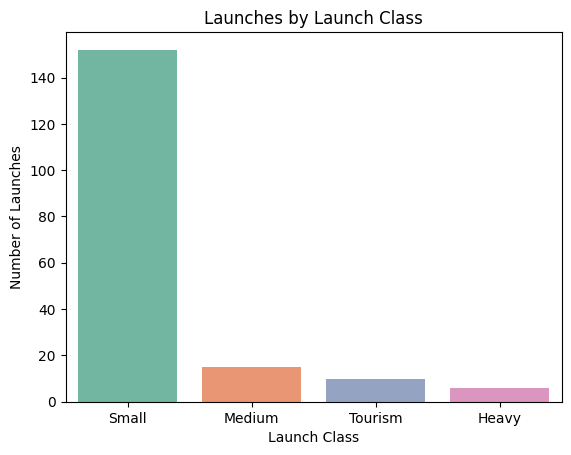

In [ ]:
sns.countplot(x='Launch Class', data=df, order=df['Launch Class'].value_counts().index, palette='Set2')
plt.title('Launches by Launch Class')
plt.xlabel('Launch Class')  # Label for x-axis
plt.ylabel('Number of Launches')  # Label for y-axis
plt.show()

**Orbit Altitude**

<ipython-input-28-51b9f3abbc3e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Orbit Altitude', data=df, order=df['Orbit Altitude'].value_counts().index, palette='Paired')


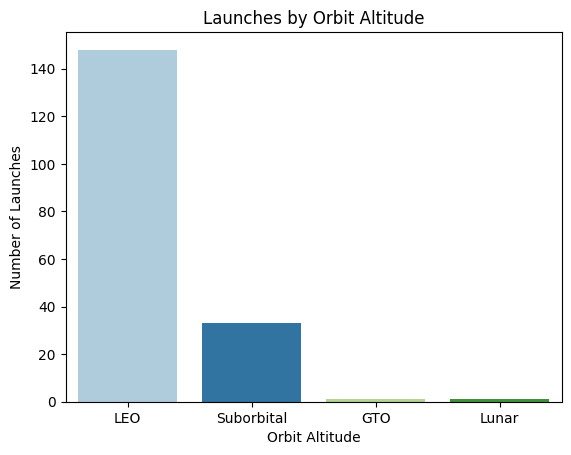

In [ ]:
sns.countplot(x='Orbit Altitude', data=df, order=df['Orbit Altitude'].value_counts().index, palette='Paired')
plt.title('Launches by Orbit Altitude')
plt.xlabel('Orbit Altitude')  # Label for x-axis
plt.ylabel('Number of Launches')  # Label for y-axis
plt.show()

**Company Description**

<ipython-input-29-921ef390e4d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Description', data=df, order=top_descriptions, palette='Set3')


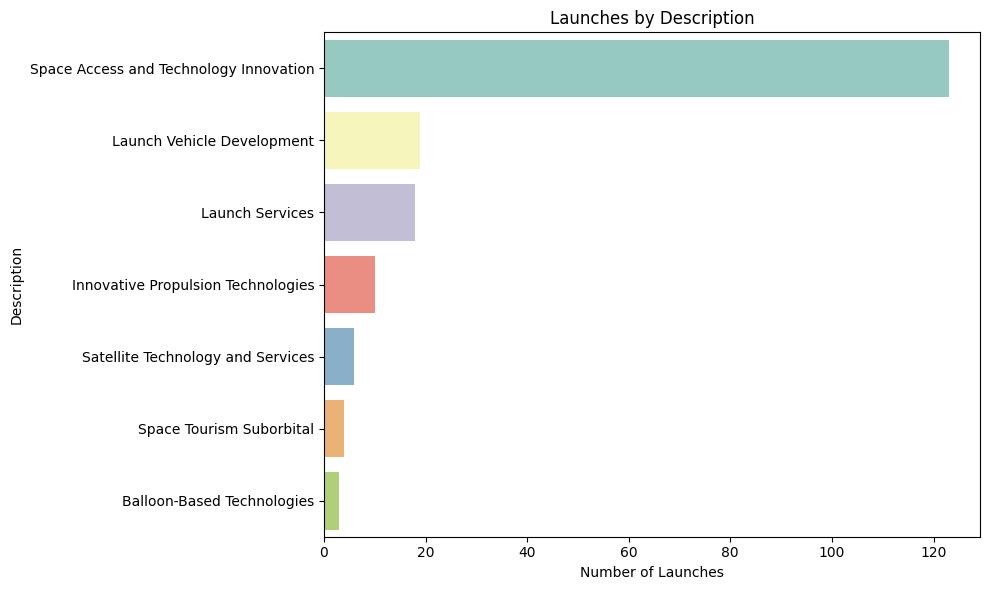

In [ ]:
# Assuming df is your DataFrame containing the data
top_descriptions = df['Description'].value_counts().index

# Create count plot using a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Description', data=df, order=top_descriptions, palette='Set3')
plt.title('Launches by Description')
plt.xlabel('Number of Launches')
plt.ylabel('Description')
plt.tight_layout()
plt.show()

Payload Distribution

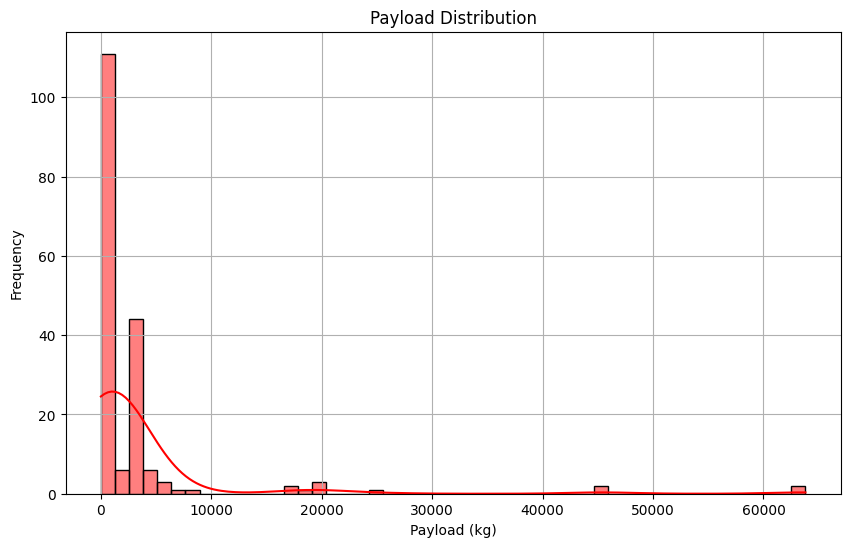

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Payload (kg)', data=df, bins=50, kde=True, color='red')
plt.title('Payload Distribution')
plt.xlabel('Payload (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Launch Cost Distribution**

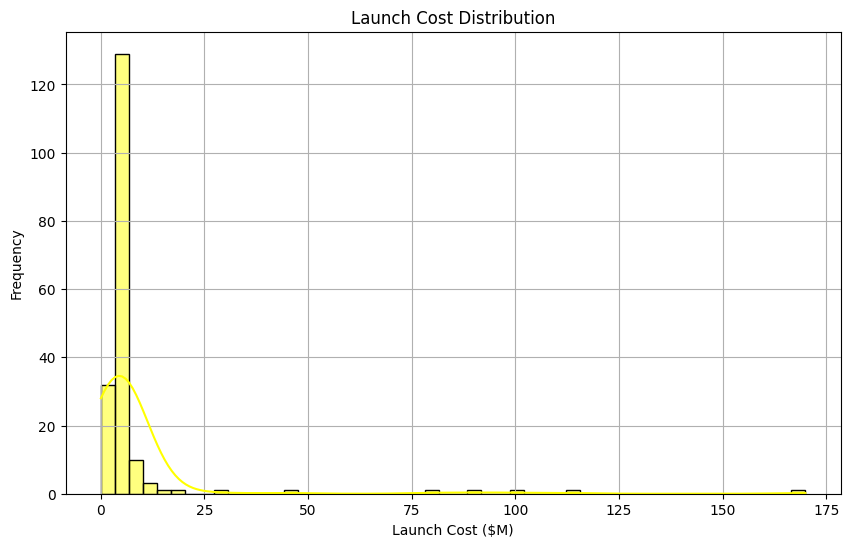

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Launch Cost ($M)', data=df, bins=50, kde=True, color='yellow')
plt.title('Launch Cost Distribution')
plt.xlabel('Launch Cost ($M)')
plt.ylabel('Frequency')
plt.grid(True)

**SFR Distribution**

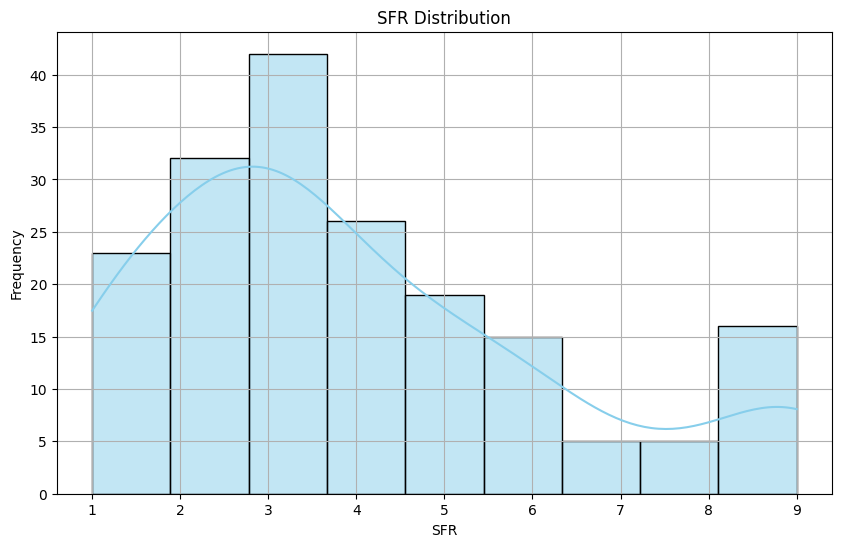

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SFR', data=df, bins=9, kde=True, color='skyblue')
plt.title('SFR Distribution')
plt.xlabel('SFR')
plt.ylabel('Frequency')
plt.grid(True)

**Top 10 countries with SFR greater than 6**

<ipython-input-33-7eb0fc135c0c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SFR', data=df_filtered, estimator=len, order=country_order, palette='viridis')


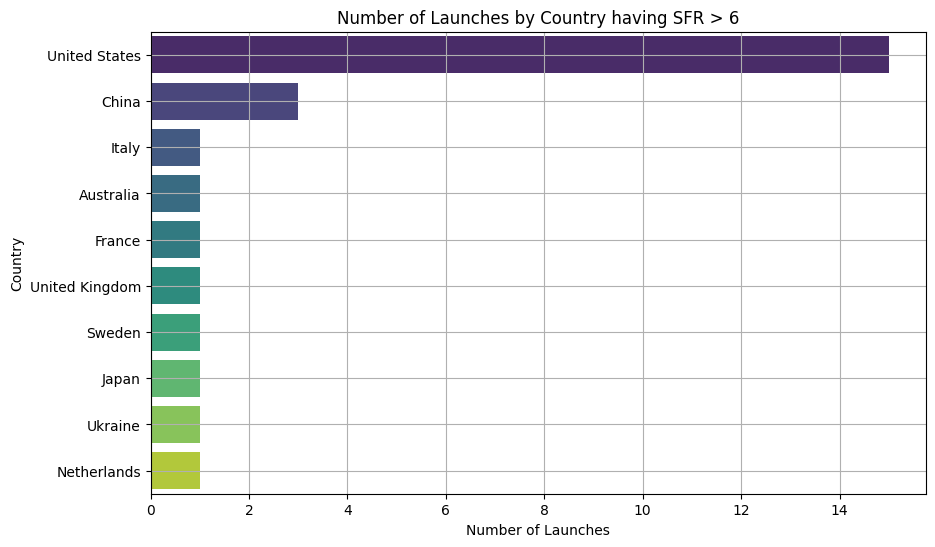

In [ ]:
# Filter DataFrame for SFR > 6
df_filtered = df[df['SFR'] > 6]

# Sort countries by the number of launches
country_order = df_filtered['Country'].value_counts().index

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Country', x='SFR', data=df_filtered, estimator=len, order=country_order, palette='viridis')
plt.title('Number of Launches by Country having SFR > 6')
plt.xlabel('Number of Launches')
plt.ylabel('Country')
plt.grid(True)

**SFR and Tech Type**

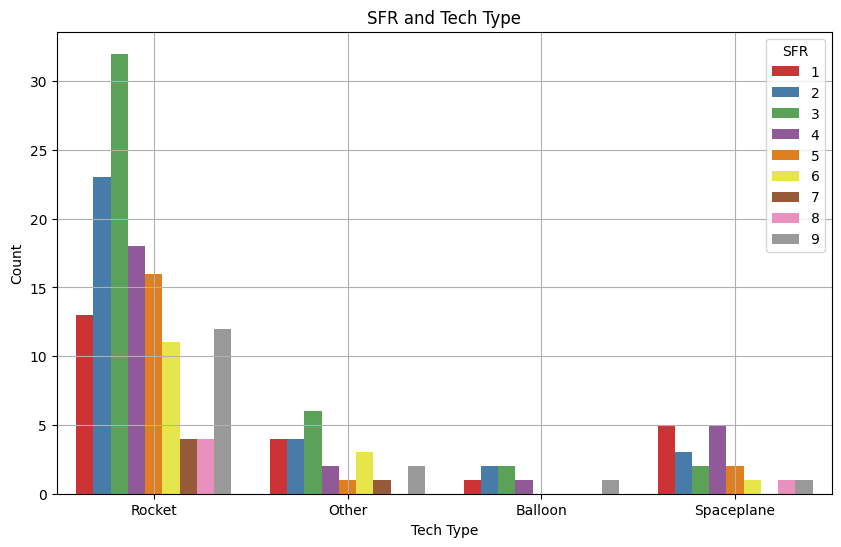

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tech Type', data=df, hue='SFR', palette='Set1')
plt.title('SFR and Tech Type')
plt.xlabel('Tech Type')
plt.ylabel('Count')
plt.legend(title='SFR')
plt.grid(True)

Text(0.5, 1.0, 'SFR and Launch Class')

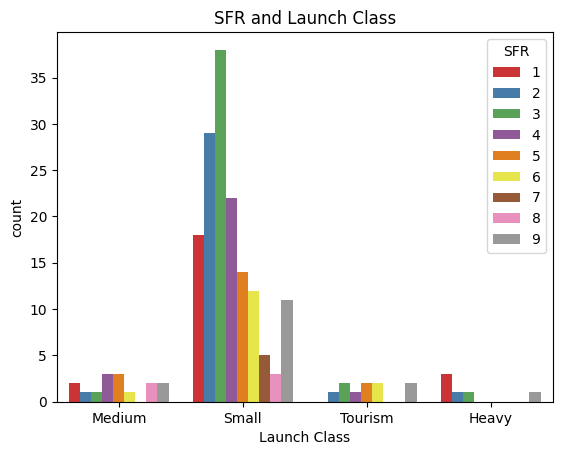

In [ ]:

sns.countplot(x = 'Launch Class', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Launch Class')

Text(0.5, 1.0, 'SFR and Orbit Altitude')

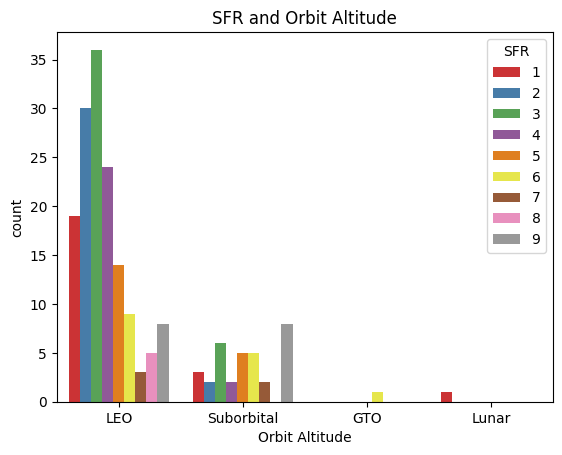

In [ ]:
sns.countplot(x = 'Orbit Altitude', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Orbit Altitude')

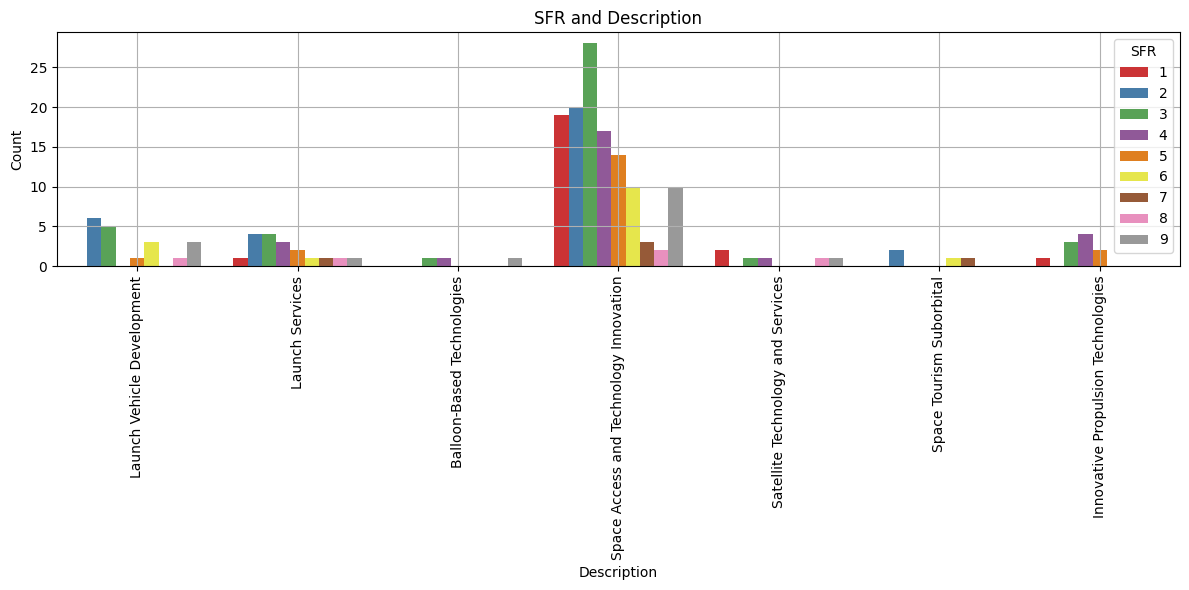

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Description', data=df, hue='SFR', palette='Set1')
plt.title('SFR and Description')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='SFR')
plt.grid(True)
plt.tight_layout()
plt.show()

**SFR and Payload**

<ipython-input-38-f1cfadfd58fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SFR', y='Payload (kg)', data=df, ax=ax[0], palette='Set1')
<ipython-input-38-f1cfadfd58fc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SFR', y='Payload (kg)', data=df, ax=ax[1], palette='Set1')


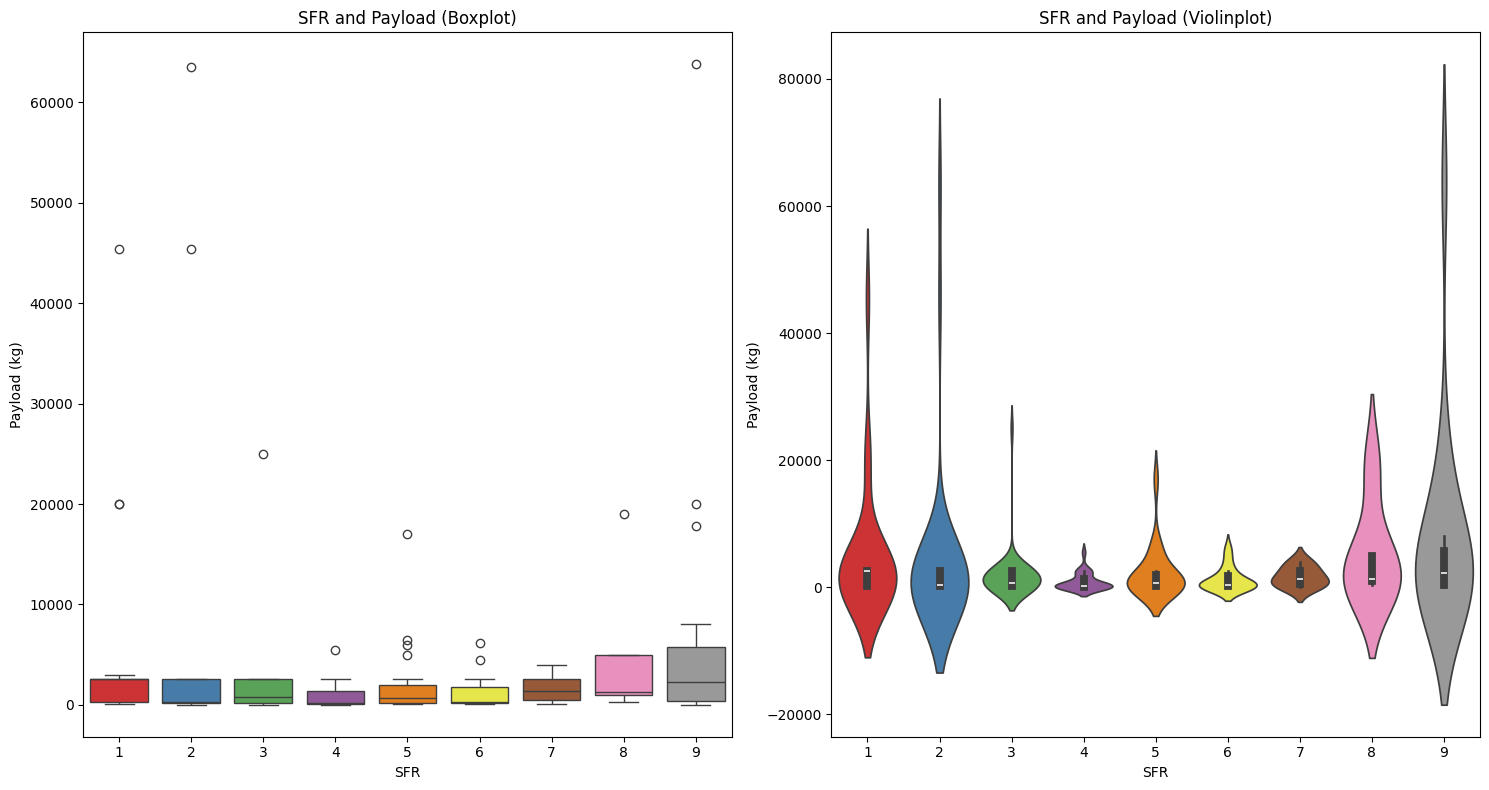

In [ ]:
# Assuming df is your DataFrame containing the data
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Boxplot
sns.boxplot(x='SFR', y='Payload (kg)', data=df, ax=ax[0], palette='Set1')
ax[0].set_title('SFR and Payload (Boxplot)')
ax[0].set_xlabel('SFR')
ax[0].set_ylabel('Payload (kg)')

# Violinplot
sns.violinplot(x='SFR', y='Payload (kg)', data=df, ax=ax[1], palette='Set1')
ax[1].set_title('SFR and Payload (Violinplot)')
ax[1].set_xlabel('SFR')
ax[1].set_ylabel('Payload (kg)')

plt.tight_layout()
plt.show()

# **Data Preprocessing Part 2**

In [ ]:
#dropping column country and company name because the SFR is dependent upon the mission specific parameters
df.drop(columns = ['Country', 'Company'], axis=1, inplace=True)

**Outlier remove**

In [ ]:
#Using Z score to remove outliers
cols = ['Payload (kg)', 'Launch Cost ($M)']
from scipy import stats
z = np.abs(stats.zscore(df[cols]))
df = df[(z < 3).all(axis=1)]

**Label Encoding the object type columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding Object
le = LabelEncoder()

#object type columns
obj_cols = ['Launch Class', 'Orbit Altitude', 'Tech Type', 'Description']

#Label Encoding
for i in obj_cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

Launch Class [2 3 1 0] 

Orbit Altitude [1 3 0 2] 

Tech Type [2 1 0 3] 

Description [2 0 5 3 4 6 1] 



<ipython-input-41-a2133305bdf9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.transform(df[i])
<ipython-input-41-a2133305bdf9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.transform(df[i])
<ipython-input-41-a2133305bdf9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Converting SFR to binary column. All the SFR greater than equal to 6 are considered as 1 and less than 6 are considered as 0.

In [ ]:
df['SFR'] = df['SFR'].apply(lambda x: 1 if x > 6 else 0)

# **Coorelation Matrix Heatmap**

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

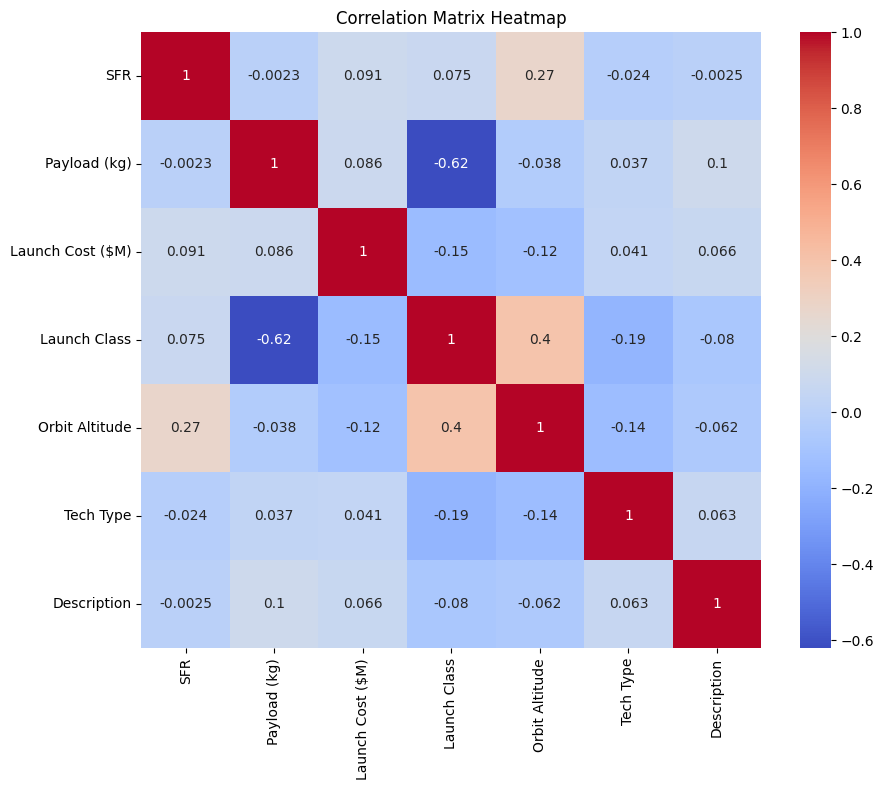

In [ ]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 10})
plt.title('Correlation Matrix Heatmap')

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'SFR', axis=1), df['SFR'], test_size=0.2, random_state=0)

# **Model Building**
I will be using the following models:

1) Random Forest Classifier

2) Decision Tree Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier Object
rfc = RandomForestClassifier()

# **Hyperparameter Tuning with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for GridSearchCV
para_grid = {
    'min_samples_split': [2,4,6,8],
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'random_state': [0,42]
}

#GridSearchCV Object
grid = GridSearchCV(estimator=rfc, param_grid=para_grid, cv=5, verbose=2, n_jobs=-1)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
#model with best parameters
rfc = RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rfc.fit(X_train, y_train)

#training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

#prediction
r_pred = rfc.predict(X_test)

Training Accuracy:  0.9


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

**Hyperparameter Tuning with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for GridSearchCV
para_grid = {
    'min_samples_split': [2,4,6,8],
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'random_state': [0,42]
}

#GridSearchCV Object
grid = GridSearchCV(estimator=dtc, param_grid=para_grid, cv=5, verbose=2, n_jobs=-1)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
#model with best parameters
dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=0)

#Fitting the model
dtc.fit(X_train, y_train)

#training accuracy
print('Training Accuracy: ', dtc.score(X_train, y_train))

#prediction
d_pred = dtc.predict(X_test)

Training Accuracy:  0.8857142857142857


# Model Evaluation

Text(0.5, 1.0, 'Decision Tree Classifier')

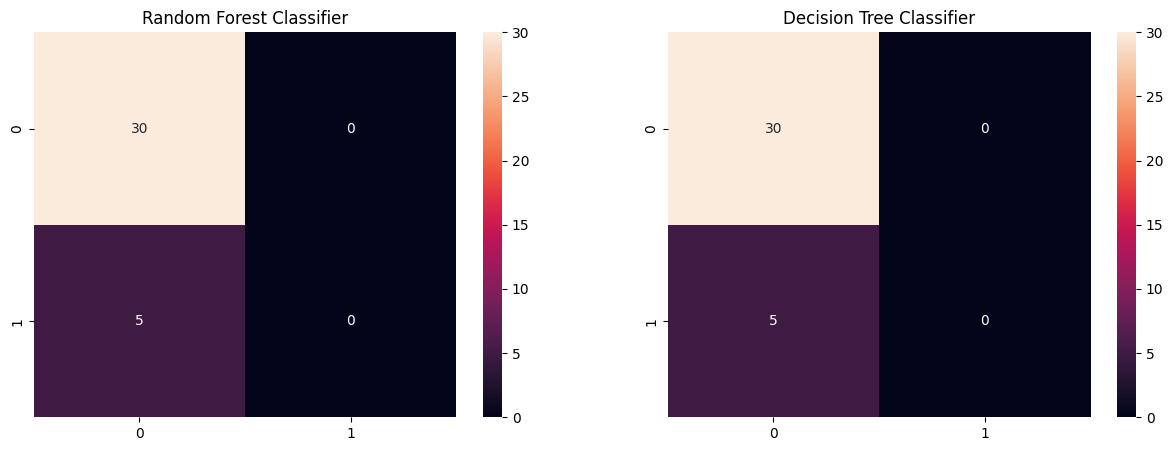

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, ax=ax[0], fmt='g').set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[1], fmt='g').set_title('Decision Tree Classifier')

<ipython-input-52-3155574c0fea>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax=ax[0], color='yellow', kde=True, label='Actual')
<ipython-input-52-3155574c0fea>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r_pred, ax=ax[0], color='green', kde=True, label='Predicted')
/usr/local/l

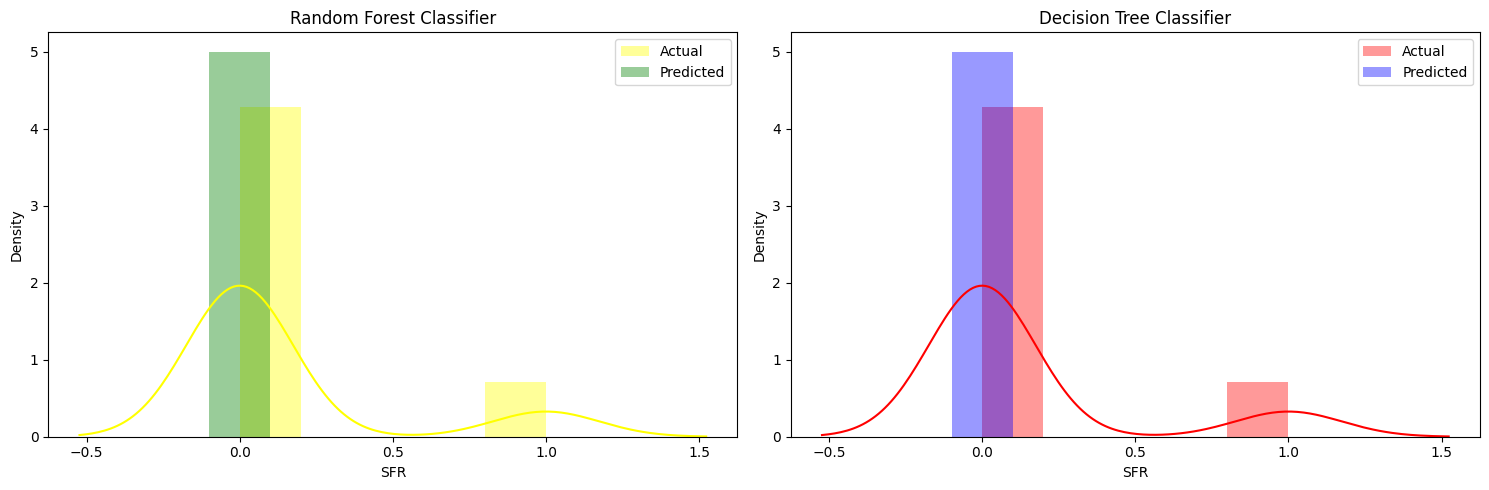

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Random Forest Classifier
sns.distplot(y_test, ax=ax[0], color='yellow', kde=True, label='Actual')
sns.distplot(r_pred, ax=ax[0], color='green', kde=True, label='Predicted')
ax[0].set_title('Random Forest Classifier')
ax[0].legend()

# Decision Tree Classifier
sns.distplot(y_test, ax=ax[1], color='r', kde=True, label='Actual')
sns.distplot(d_pred, ax=ax[1], color='b', kde=True, label='Predicted')
ax[1].set_title('Decision Tree Classifier')
ax[1].legend()

plt.tight_layout()

# **Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print('Random Forest Classifier\n', classification_report(y_test, r_pred),'\n')
print('Decision Tree Classifier\n', classification_report(y_test, d_pred))

Random Forest Classifier
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       0.00      0.00      0.00         5

    accuracy                           0.86        35
   macro avg       0.43      0.50      0.46        35
weighted avg       0.73      0.86      0.79        35
 

Decision Tree Classifier
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       0.00      0.00      0.00         5

    accuracy                           0.86        35
   macro avg       0.43      0.50      0.46        35
weighted avg       0.73      0.86      0.79        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# SVM Classifier Object
svc = SVC()

# Parameters for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state': [0, 42]  # Note: This parameter is only applicable if the kernel is 'poly'
}

# RandomizedSearchCV Object
rand_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=50, cv=5, verbose=2, n_jobs=-1)


In [ ]:

# Fitting the model
rand_search.fit(X_train, y_train)

# Best parameters
print(rand_search.best_params_)

# Model with best parameters
svc = SVC(C=rand_search.best_params_['C'],
          gamma=rand_search.best_params_['gamma'],
          kernel=rand_search.best_params_['kernel'],
          random_state=rand_search.best_params_.get('random_state', None))

# Fitting the model
svc.fit(X_train, y_train)

# Training accuracy
print('Training Accuracy: ', svc.score(X_train, y_train))

# Prediction
s_pred = svc.predict(X_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
